# Paper figures
This notebook provides the code for generating the figures of our paper.

In [1]:
import numpy as np

from ddm import Model, Drift, InitialCondition
from ddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision
from ddm.functions import fit_adjust_model

#load functions that we created
import sys
sys.path.insert(0,'./../src/pyddm_extensions/')
sys.path.append('./../src/') #this is where the utilities are

from nlDDM import nlddmDummy
from extras import ICIntervalRatio

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

## 1. DDM formalism

<IPython.core.display.Javascript object>


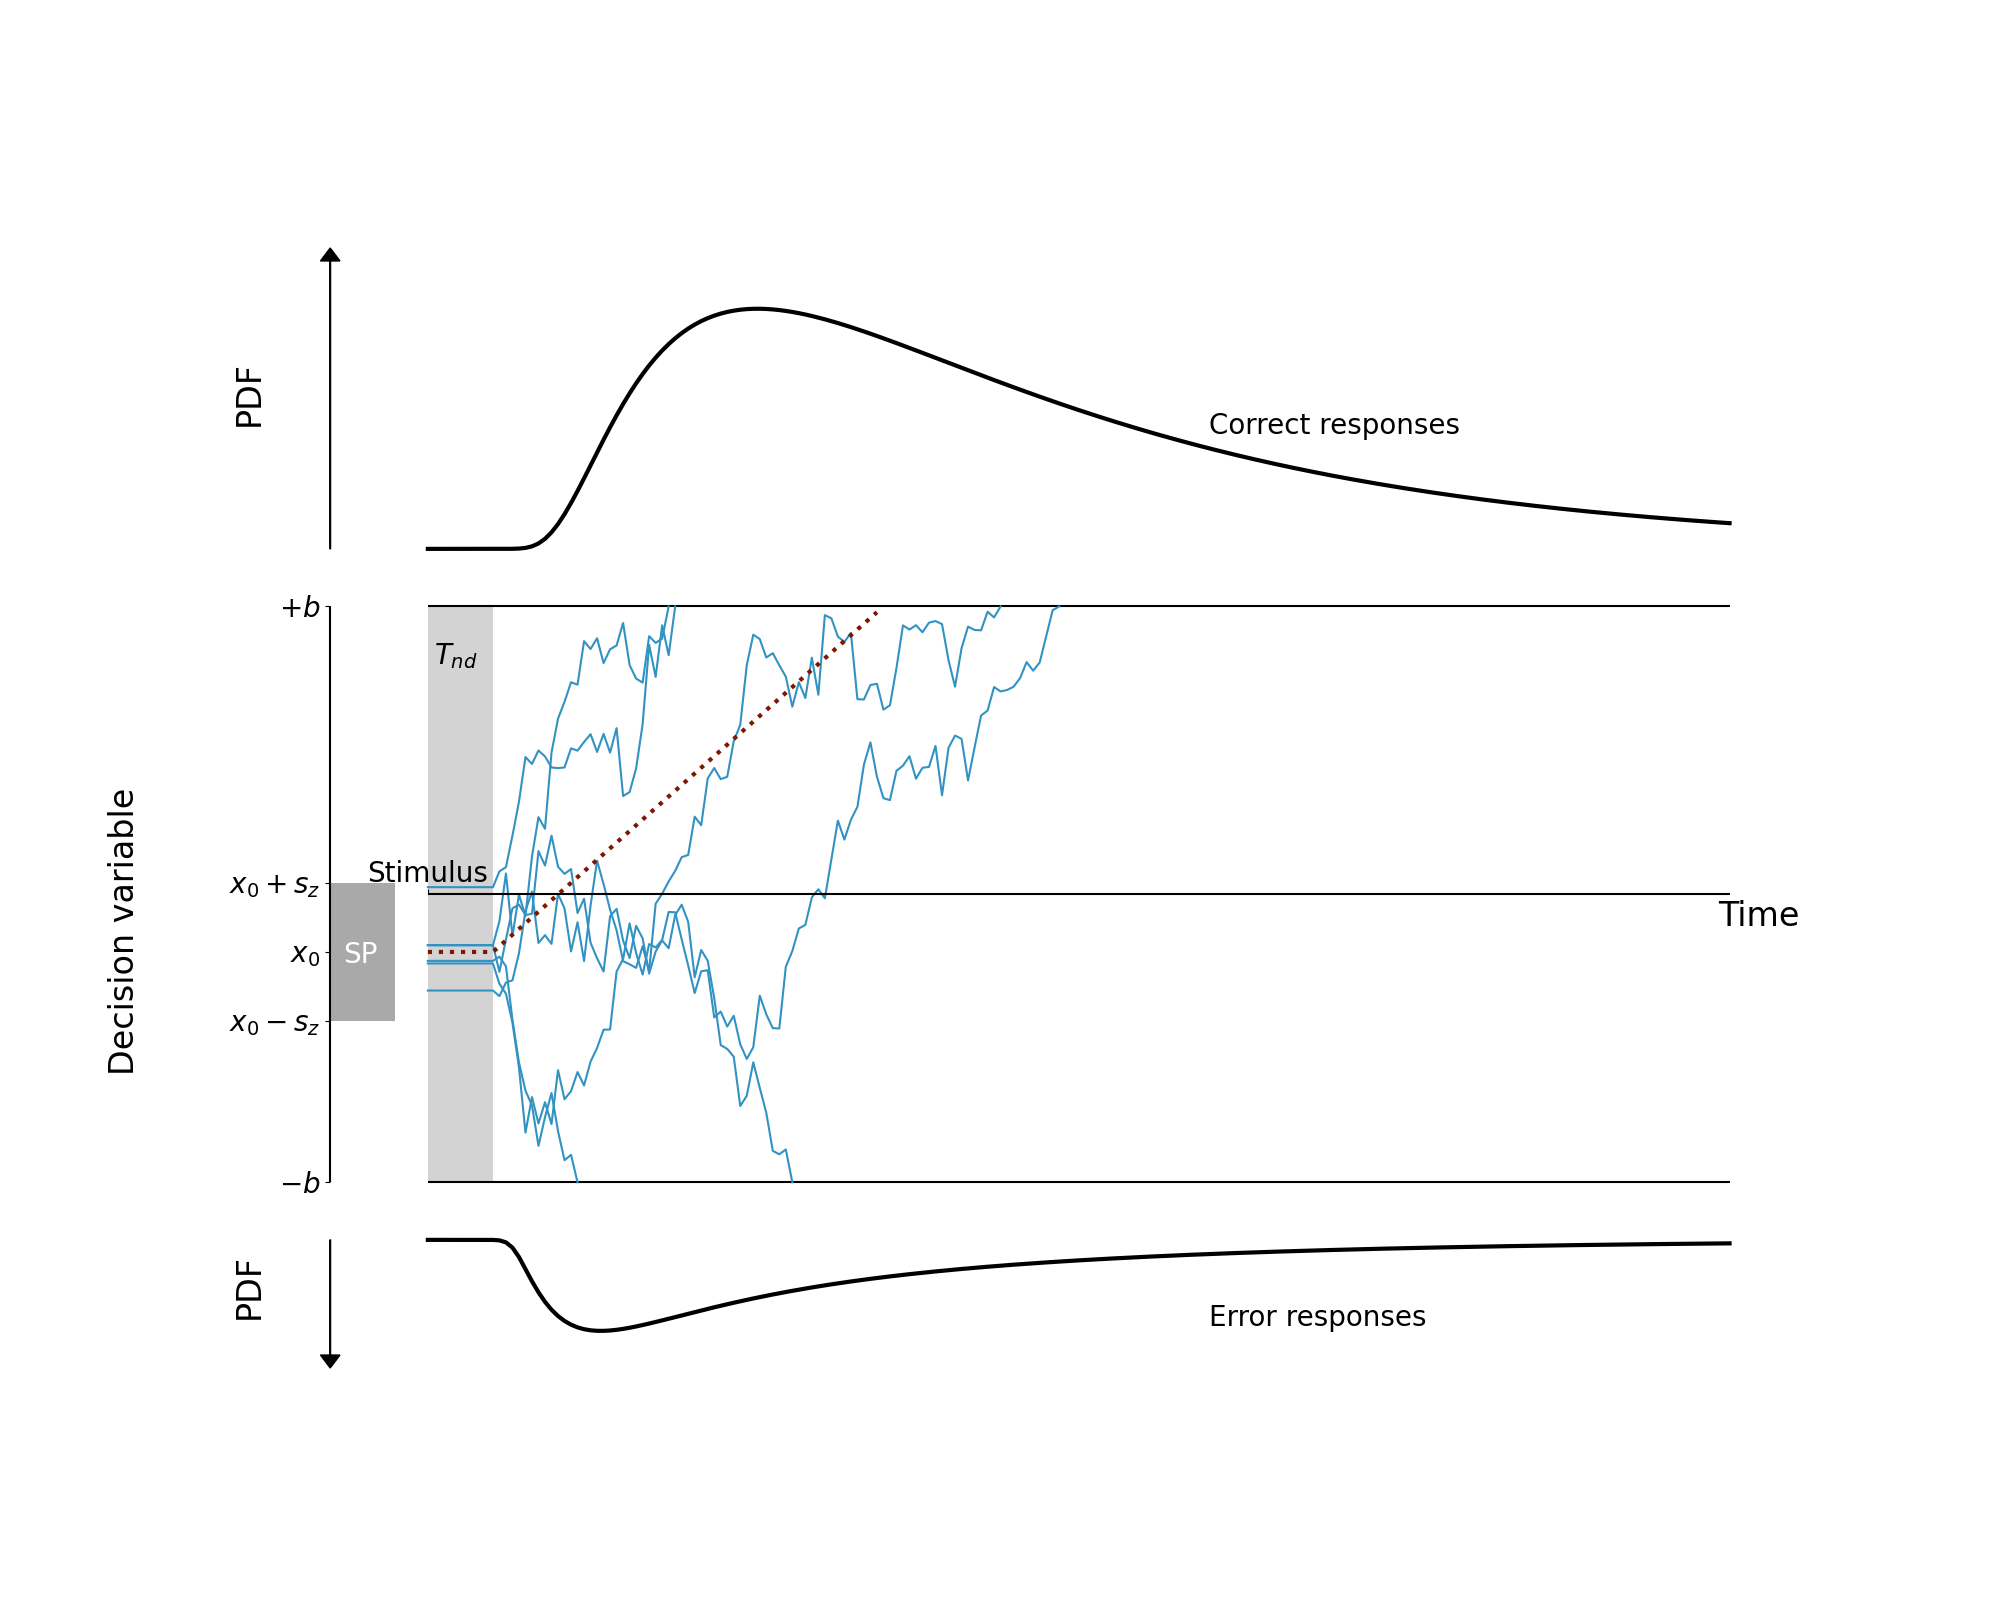

Text(0.01, 0.8, '$T_{nd}$')

In [2]:
from utilities import draw_line

m = Model(name='Simple model',
              drift=DriftConstant(drift=1.),
              noise=NoiseConstant(noise=1.),
              bound=BoundConstant(B=1.),
              IC=ICIntervalRatio(x0=-0.2,sz=0.3),
              overlay=OverlayNonDecision(nondectime=.1),
              dx=.001, dt=.01, T_dur=2)

s = m.solve()

#here we plot the distributions
fig,ax=plt.subplots(figsize=(20,16))

ax.tick_params(axis="x",direction="in", pad=-25)

ax.plot(s.model.t_domain(), s.pdf_corr()+1.2, color='k',linewidth=3) #plot the histogram of correct responses
ax.plot(s.model.t_domain(), -s.pdf_err()-1.2, color='k',linewidth=3)
ax.arrow(-.15, 1.2, 0, 1, color='k',head_width=.03)
ax.arrow(-.15, -1.2, 0, -.4, color="k",head_width=.03)
plt.text(-.30, 1.65, 'PDF',fontsize=24,rotation='vertical')
plt.text(-.3,-1.45,'PDF',fontsize=24,rotation='vertical')

#here generate the middle of what we want
ax.hlines(1,0,2, color='k')
ax.hlines(-1,0,2, color='k')
for i in range (6):
    trial=m.simulate_trial(seed=i)
    trial[trial>1]=1
    trial[trial<-1]=-1
    ax.plot(s.model.t_domain()[0:len(trial)],trial, color='#3292C2')#grey

#here we plot other information (Tnd, drift, SP distribution)
ax.fill_between([0,0,0.1,0.1,0],[-1,1,1,-1,-1],edgecolor=None, facecolor='#D3D3D3')#,alpha=0.2)

perfect_trajectory=np.ones((len(s.model.t_domain()),))
begin_drift=np.min(np.where(s.model.t_domain()>0.1)[0])
perfect_trajectory[0:begin_drift]=-0.2
perfect_trajectory[begin_drift::]=draw_line(2,-0.2,s.model.t_domain(),0.1)[begin_drift::]
ix_end=np.min(np.where(perfect_trajectory>1))
ax.plot(s.model.t_domain()[0:ix_end],perfect_trajectory[0:ix_end],color='#7E1700',linewidth=3.,linestyle="dotted")

sns.despine()
ax.spines['left'].set_position(('data', -0.15))
ax.spines['left'].set_visible(False)
ax.vlines(-0.15,-1,1, color='k')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['bottom'].set_visible(False)
ax.hlines(0,0,2,color='k')

ax.fill_between([-0.15,-0.15,-0.05,-0.05,-0.15],[-.44,.04,.04,-.44,-.44],edgecolor=None, facecolor='#A9A9A9')#,alpha=0.4)

ax.set_yticks([1,.04,-0.2,-.44,-1])
ax.set_yticklabels([r'$+b$',r'$x_0+s_z$',r'$x_0$',r'$x_0-s_z$',r'$-b$'],fontsize=20)
ax.set_xticks([0])
ax.set_xticklabels(['Stimulus'], fontsize=20)

ax.set_ylabel('Decision variable',fontsize=24)
ax.yaxis.set_label_coords(-0.07,0.4)
ax.set_xlabel('Time',fontsize=24,loc='right')

plt.text(1.2, 1.6, 'Correct responses',fontsize=20)
plt.text(1.2,-1.5,'Error responses',fontsize=20)
plt.text(-.13, -.24, 'SP',fontsize=20, color='white')
plt.text(0.01,0.8,r'$T_{nd}$',fontsize=20)

## 1. nlDDM formalism

<IPython.core.display.Javascript object>


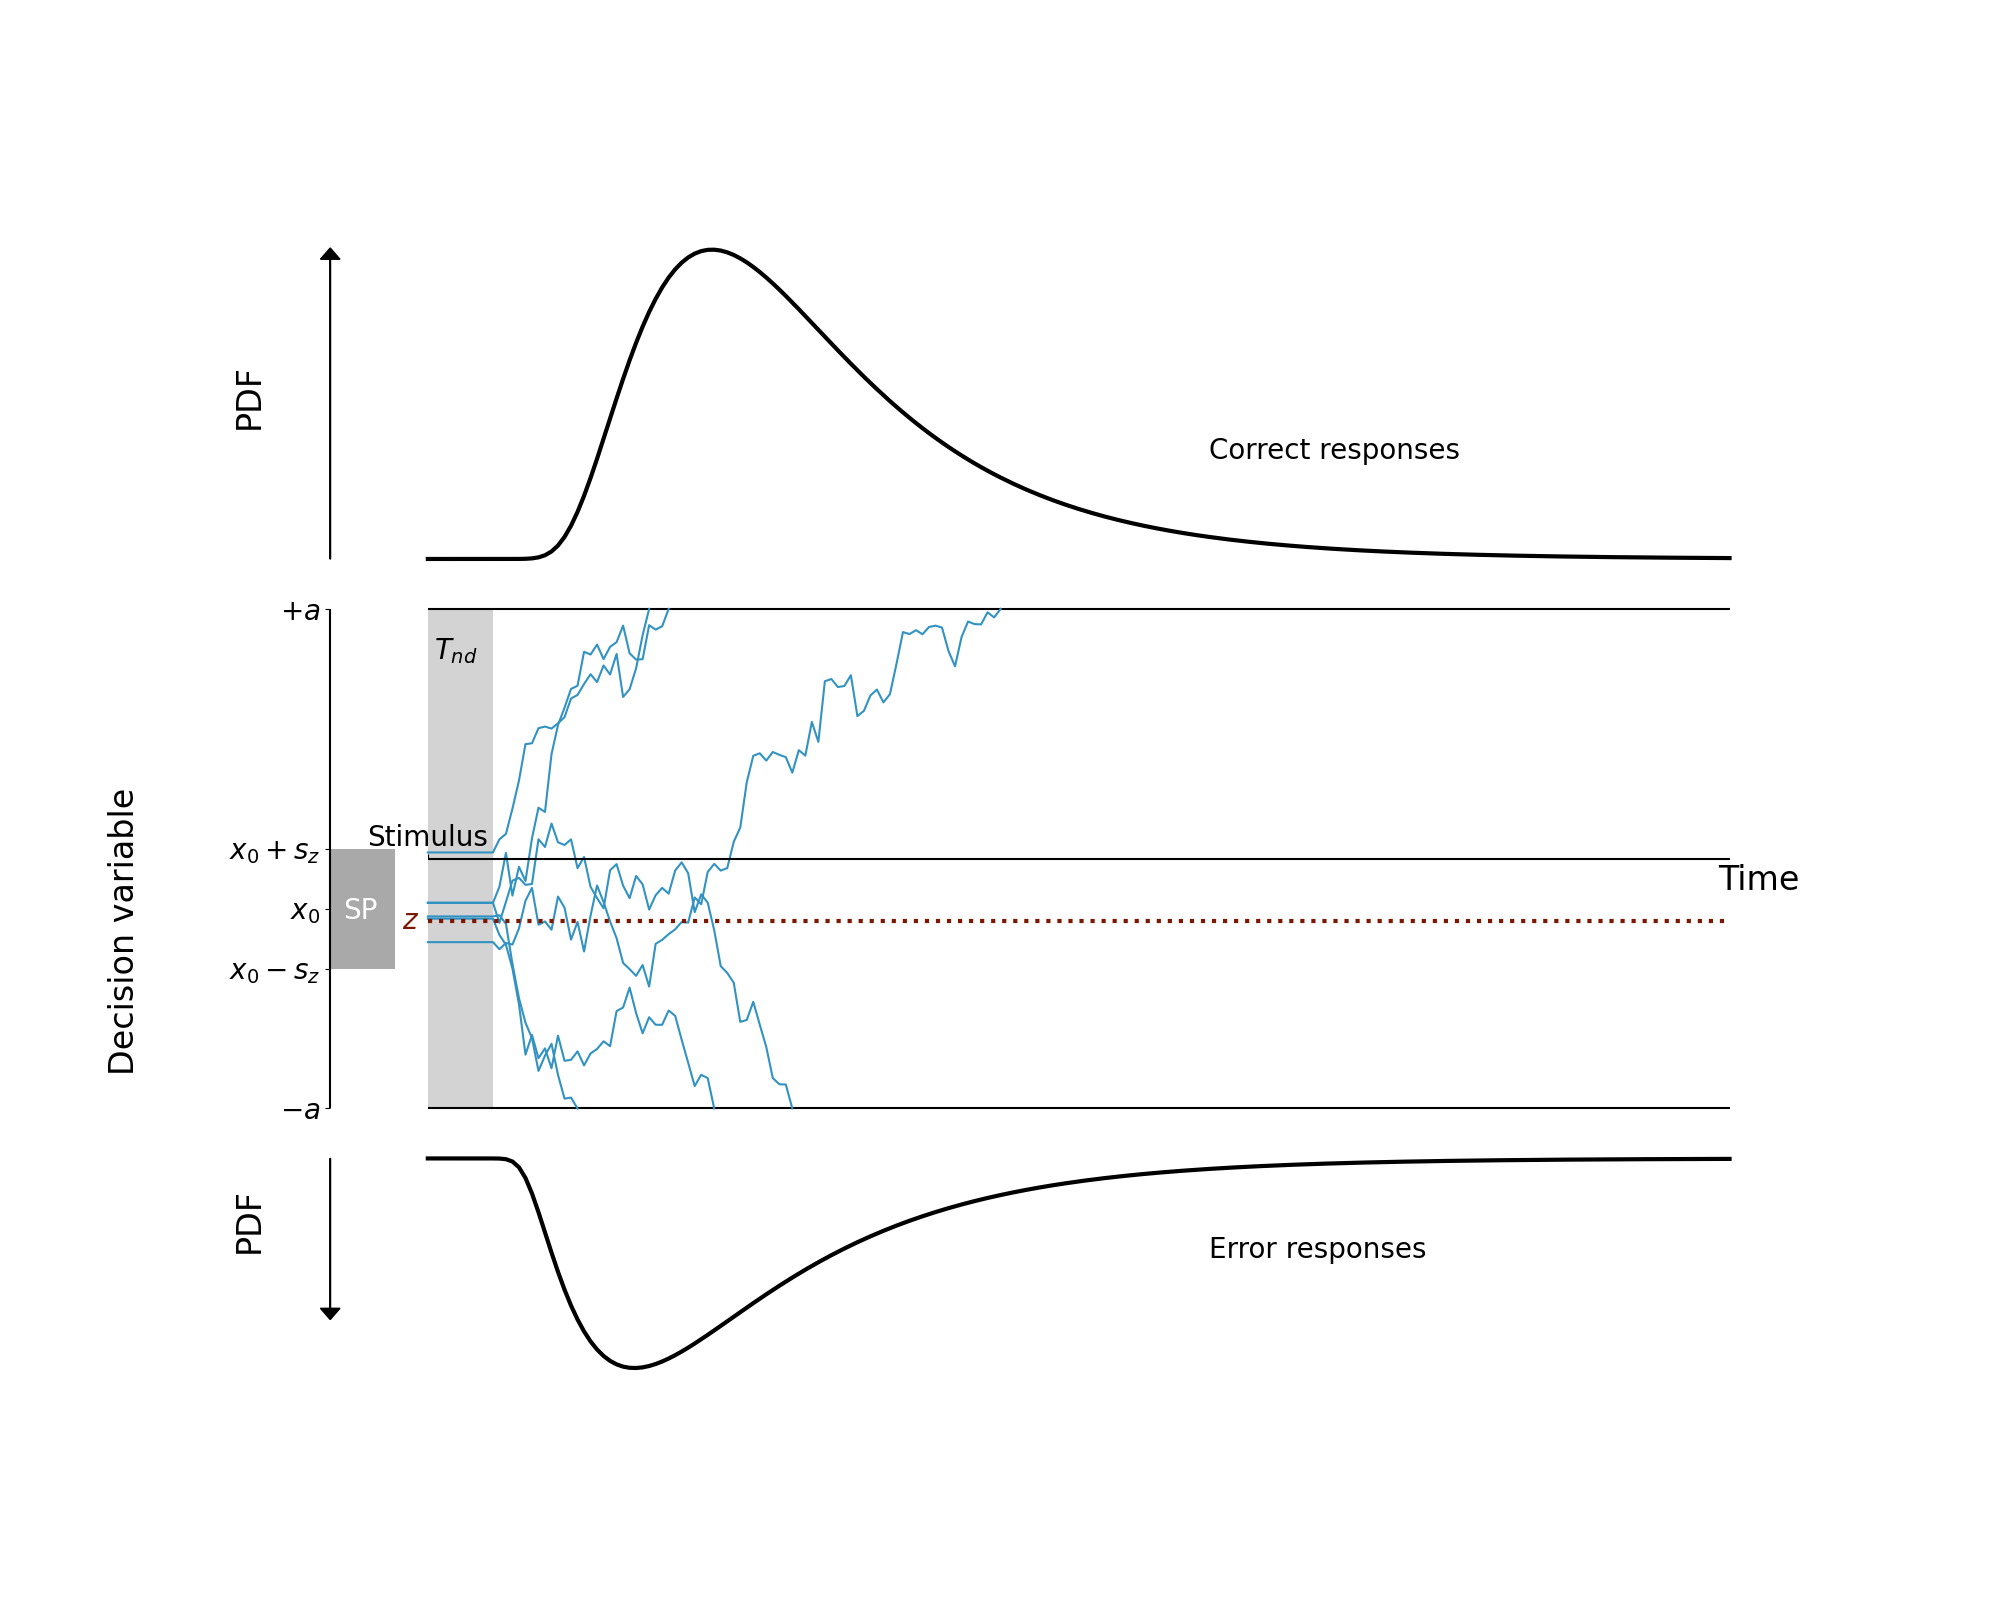

Text(-0.04, -0.28, '$z$')

In [3]:
m=Model(name="my dummy nl-DDM", drift=nlddmDummy(k=5.5,a=1,z=-.25), #nice trajectories with z=-.4
            noise=NoiseConstant(noise=.8),#.3
            bound=BoundConstant(B=1), 
            IC=ICIntervalRatio(x0=-0.2,sz=0.3),
            overlay=OverlayNonDecision(nondectime=.1),
            dx=0.001,
            dt=0.01,
            T_dur=2.)

s = m.solve()

#here we plot the distributions
fig,ax=plt.subplots(figsize=(20,16))

ax.tick_params(axis="x",direction="in", pad=-25)

ax.plot(s.model.t_domain(), s.pdf_corr()+1.2, color='k',linewidth=3) #plot the histogram of correct responses
ax.plot(s.model.t_domain(), -s.pdf_err()-1.2, color='k',linewidth=3)
ax.arrow(-.15, 1.2, 0, 1.2, color='k',head_width=.03)
ax.arrow(-.15, -1.2, 0, -.6, color="k",head_width=.03)
plt.text(-.30, 1.75, 'PDF',fontsize=24,rotation='vertical')
plt.text(-.3,-1.55,'PDF',fontsize=24,rotation='vertical')

#here generate the middle of what we want
ax.hlines(1,0,2., color='k')
ax.hlines(-1,0,2., color='k')
for i in range (6):
    trial=m.simulate_trial(seed=i)
    trial[trial>1]=1
    trial[trial<-1]=-1
    ax.plot(s.model.t_domain()[0:len(trial)],trial, color='#3292C2')#grey

#here we plot other information (Tnd, drift, SP distribution)
ax.fill_between([0,0,0.1,0.1,0],[-1,1,1,-1,-1],edgecolor=None, facecolor='#D3D3D3')#here this is for Tnd

ax.hlines(-.25,0,2.,color='#7E1700',linewidth=3.,linestyle="dotted")

sns.despine()
ax.spines['left'].set_position(('data', -0.15))
ax.spines['left'].set_visible(False)
ax.vlines(-0.15,-1,1, color='k')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['bottom'].set_visible(False)
ax.hlines(0,0,2.,color='k')

ax.fill_between([-0.15,-0.15,-0.05,-0.05,-0.15],[-.44,.04,.04,-.44,-.44],edgecolor=None, facecolor='#A9A9A9')#,alpha=0.4)

ax.set_yticks([1,.04,-0.2,-.44,-1])
ax.set_yticklabels([r'$+a$',r'$x_0+s_z$',r'$x_0$',r'$x_0-s_z$',r'$-a$'],fontsize=20)
ax.set_xticks([0])
ax.set_xticklabels(['Stimulus'], fontsize=20)

ax.set_ylabel('Decision variable',fontsize=24)
ax.yaxis.set_label_coords(-0.07,0.4)
ax.set_xlabel('Time',fontsize=24,loc='right')

plt.text(1.2, 1.6, 'Correct responses',fontsize=20)
plt.text(1.2,-1.6,'Error responses',fontsize=20)
plt.text(-.13, -.24, 'SP',fontsize=20, color='white')
plt.text(0.01,0.8,r'$T_{nd}$',fontsize=20)

plt.text(-0.04,-.28,r'$z$',color='#7E1700', fontsize=20)

Potential function when $z$ varies

<IPython.core.display.Javascript object>


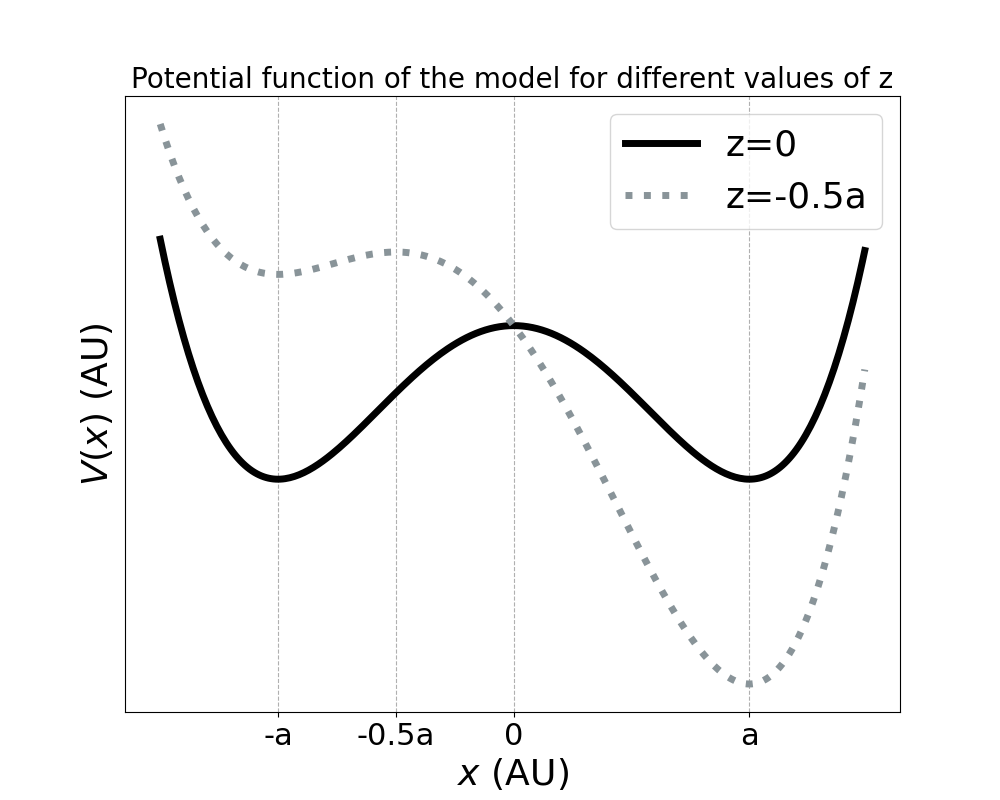

Text(0.5, 1.0, 'Potential function of the model for different values of z')

In [4]:
from utilities import potential

xtemp=np.arange(-1.5,1.5, 0.01)
ztemp=[0,-0.5]
a=1
k=1
plt.figure(figsize=(10,8))
plt.plot(xtemp,potential(xtemp,ztemp[0],a,k),'k',label='z=0', linewidth=5)
plt.plot(xtemp,potential(xtemp,ztemp[1],a,k),'#899499',label='z=-0.5a', linestyle=':',linewidth=5)#nice shade but too light:'#a4e5d3'
plt.ylabel('$V(x)$ (AU)',fontsize=26)
plt.xlabel('$x$ (AU)',fontsize=26)
plt.xticks(ticks=[-1,-0.5,0,1], labels=["-a","-0.5a","0","a"],fontsize=22)
plt.yticks(ticks=[],fontsize=22)
plt.grid(linestyle='--')
plt.legend(fontsize=26)
plt.title('Potential function of the model for different values of z',fontsize=20)

Potential function when $a$ varies

<IPython.core.display.Javascript object>


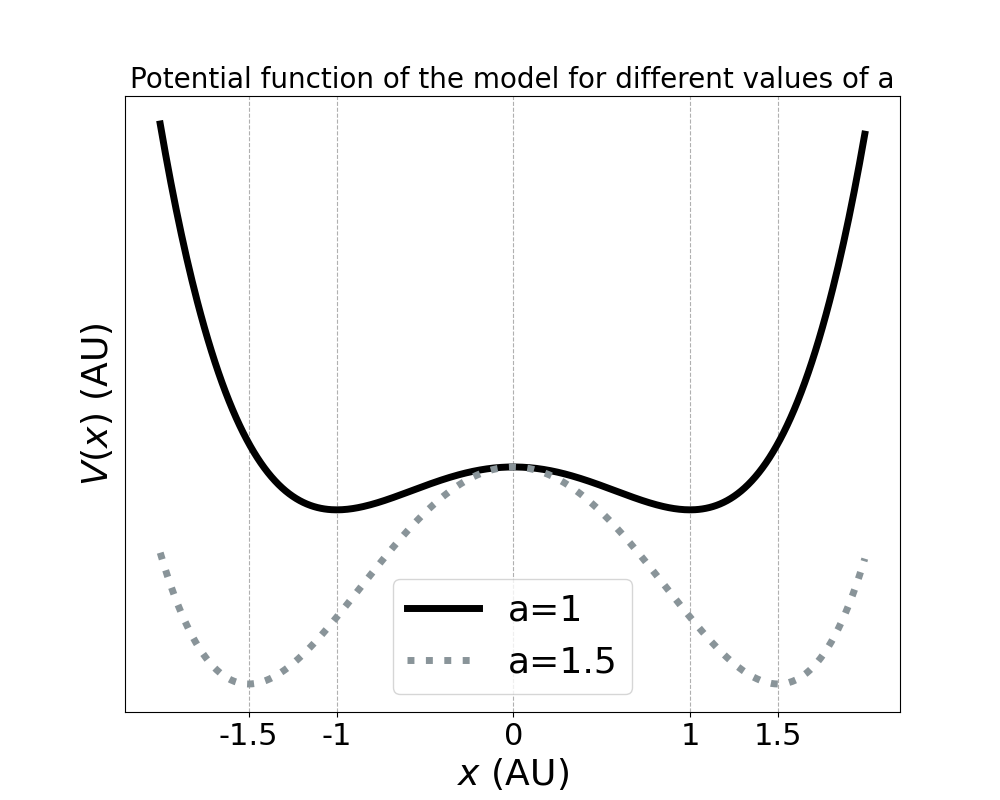

Text(0.5, 1.0, 'Potential function of the model for different values of a')

In [5]:
xtemp=np.arange(-2,2, 0.01)
z=0
atemp=[1,1.5]
k=1
plt.figure(figsize=(10,8))
plt.plot(xtemp,potential(xtemp,z,atemp[0],k),'k',label='a=1', linewidth=5)
plt.plot(xtemp,potential(xtemp,z,atemp[1],k),'#899499',label='a=1.5', linestyle=':',linewidth=5)
plt.ylabel('$V(x)$ (AU)',fontsize=26)
plt.xlabel('$x$ (AU)',fontsize=26)
plt.xticks(ticks=[-1.5,-1,0,1,1.5], labels=["-1.5","-1","0","1","1.5"],fontsize=22)
plt.yticks(ticks=[],fontsize=22)
plt.grid(linestyle='--')
plt.legend(fontsize=26)
plt.title('Potential function of the model for different values of a',fontsize=20)

Potential function when $k$ varies

<IPython.core.display.Javascript object>


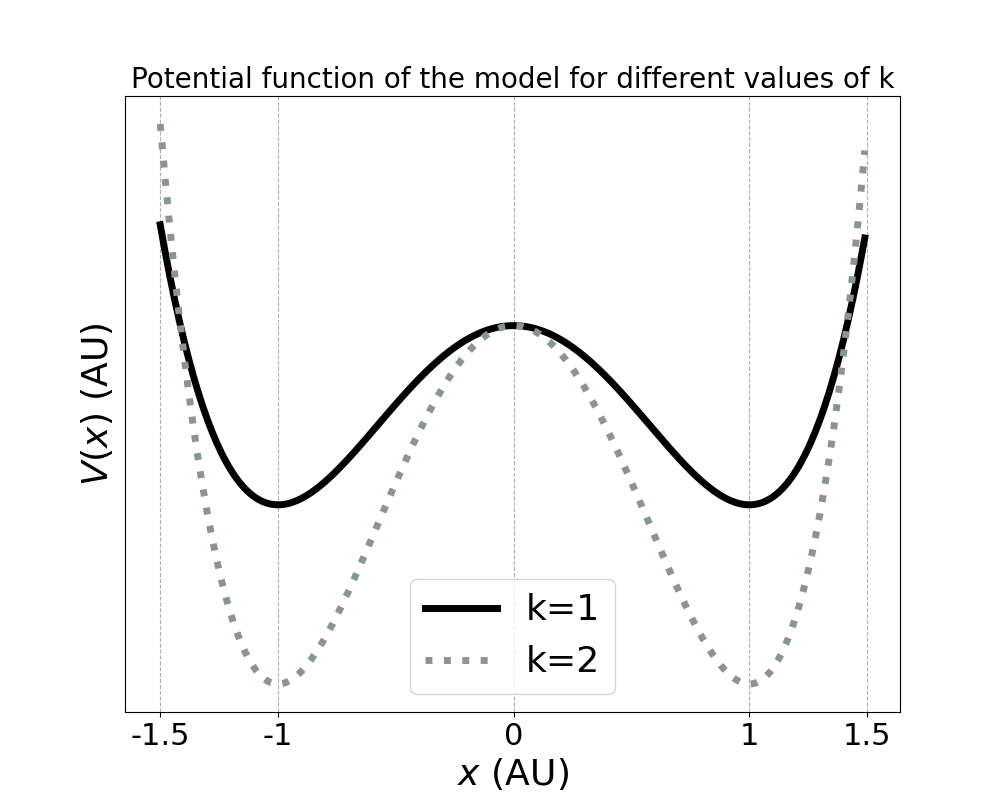

Text(0.5, 1.0, 'Potential function of the model for different values of k')

In [6]:
xtemp=np.arange(-1.5,1.5, 0.01)
z=0
a=1
ktemp=[1,2]
plt.figure(figsize=(10,8))
plt.plot(xtemp,potential(xtemp,z,a,ktemp[0]),'k',label='k=1', linewidth=5)
plt.plot(xtemp,potential(xtemp,z,a,ktemp[1]),'#899499',label='k=2', linestyle=':',linewidth=5)
plt.ylabel('$V(x)$ (AU)',fontsize=26)
plt.xlabel('$x$ (AU)',fontsize=26)
plt.xticks(ticks=[-1.5,-1,0,1,1.5], labels=["-1.5","-1","0","1","1.5"],fontsize=22)
plt.yticks(ticks=[],fontsize=22)
plt.grid(linestyle='--')
plt.legend(fontsize=26)
plt.title('Potential function of the model for different values of k',fontsize=20)

These are what the noiseless trajectories look like in the nl-DDM case, for different values of the initial condition $x_0$

<IPython.core.display.Javascript object>


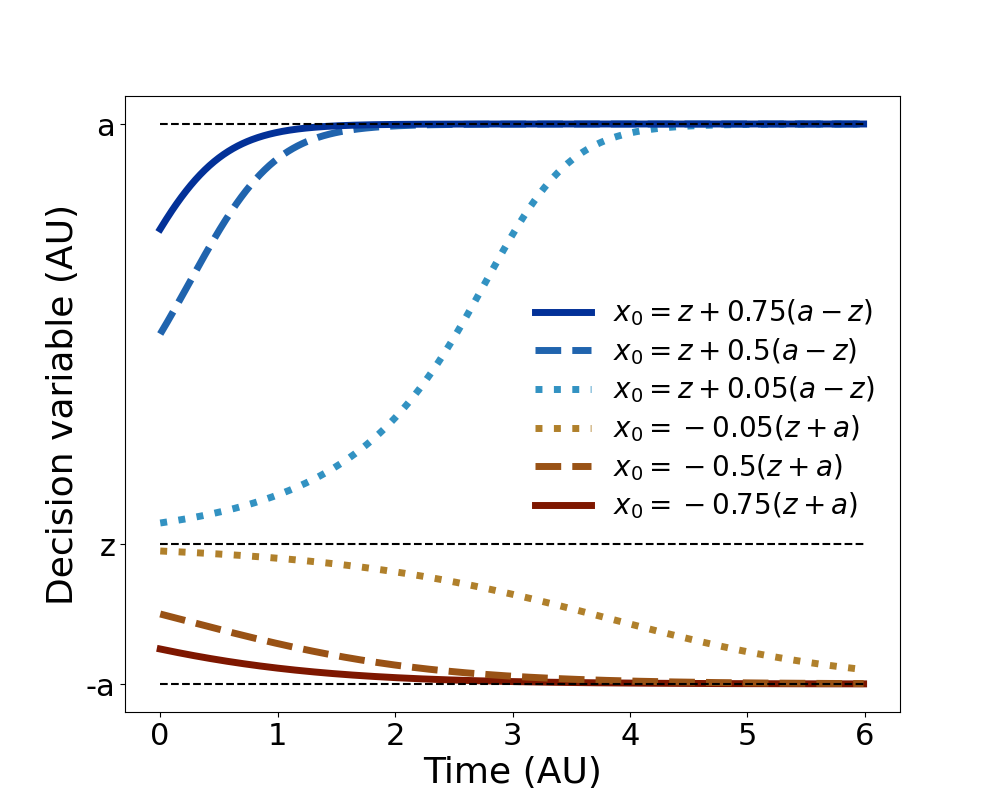

In [7]:
from utilities import EulerMaruyama, noise_fun, nlddm

a=1
k=1
z=-0.5
dt=0.01
t=np.arange(0,6,dt)
x0s=[-0.75*0.5-0.5,-0.5-0.25, -0.5-0.05*0.5,-0.5+1.5*0.05,-0.5+1.5*0.5,-0.5+1.5*0.75]
ntrials=len(x0s)

trajectories=np.zeros((ntrials,len(t)))
for tr in range(ntrials):
    trajectories[tr,:]=EulerMaruyama(nlddm,noise_fun,x0s[tr],t,a,k,z)
    
linestyles=['solid','dashed','dotted','dotted','dashed','solid']
colors=['#7E1700','#995215','#B0802B','#3292C2','#2064AE','#033198']

plt.figure(figsize=(10,8))
for i in range (ntrials):
    plt.plot(t, trajectories[i,:],color=colors[i], linestyle=linestyles[i], linewidth=5)
plt.hlines(a,0,6, "k","--")
plt.hlines(-a,0,6, "k",'--')
plt.hlines(z,0,6, "k",'--')
plt.yticks(ticks=[-a,z,a], labels=["-a","z","a"],fontsize=22)
plt.xticks(fontsize=22)
plt.xlabel('Time (AU)', fontsize=26)
plt.ylabel('Decision variable (AU)', fontsize=26)
plt.legend([r'$x_0=-0.75(z+a)$',r'$x_0=-0.5(z+a)$',r'$x_0=-0.05(z+a)$',r'$x_0=z+0.05(a-z)$',r'$x_0=z+0.5(a-z)$',r'$x_0=z+0.75(a-z)$'], frameon=False, bbox_to_anchor=(1., 0.4),labelspacing=-2.5,fontsize=20)

This form is the one presented in the paper. Its advantage is that it does not depend on the duration of the trajectory

<IPython.core.display.Javascript object>


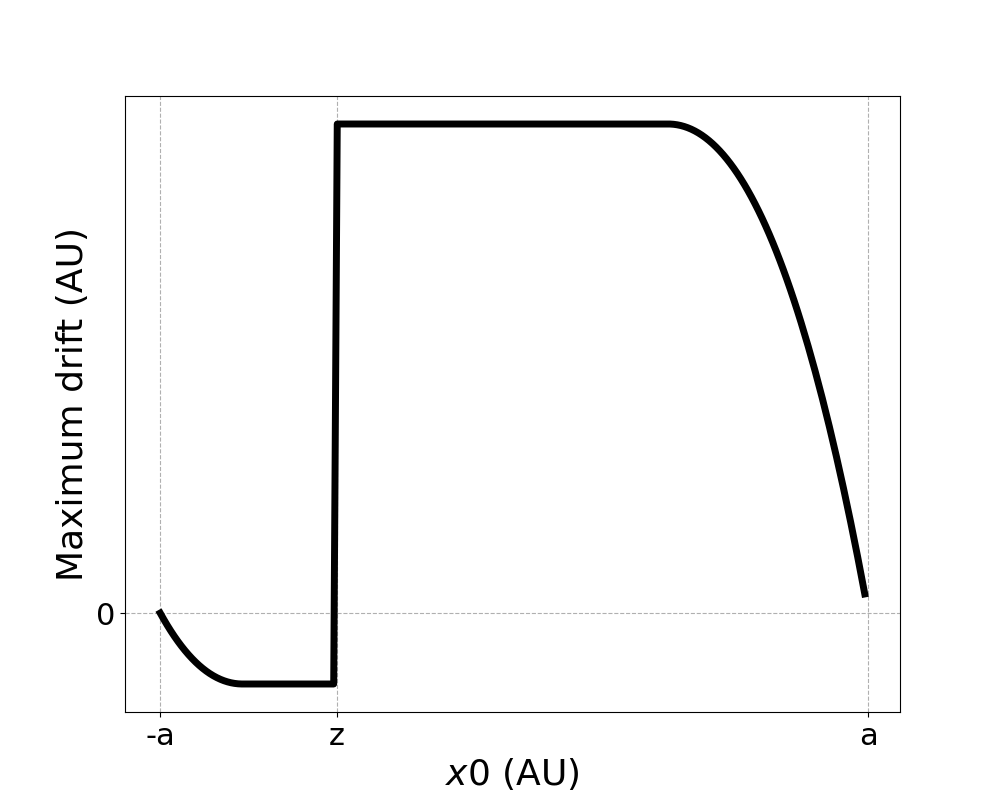

In [8]:
from utilities import x_max, max_drift

x0=np.arange(-a,a,0.01)

plt.figure(figsize=(10,8))
plt.plot(x0,max_drift(x0,1,1,-0.5),'k',linewidth=5)
plt.ylabel('Maximum drift (AU)',fontsize=26)
plt.xlabel('$x0$ (AU)',fontsize=26)
plt.xticks(ticks=[-a,z,a], labels=["-a","z","a"],fontsize=22)
plt.yticks(ticks=[0],fontsize=22)
plt.grid(linestyle='--')

With the previous definition, this is how the mean drift varies as a function of $a$ and $z$

<IPython.core.display.Javascript object>


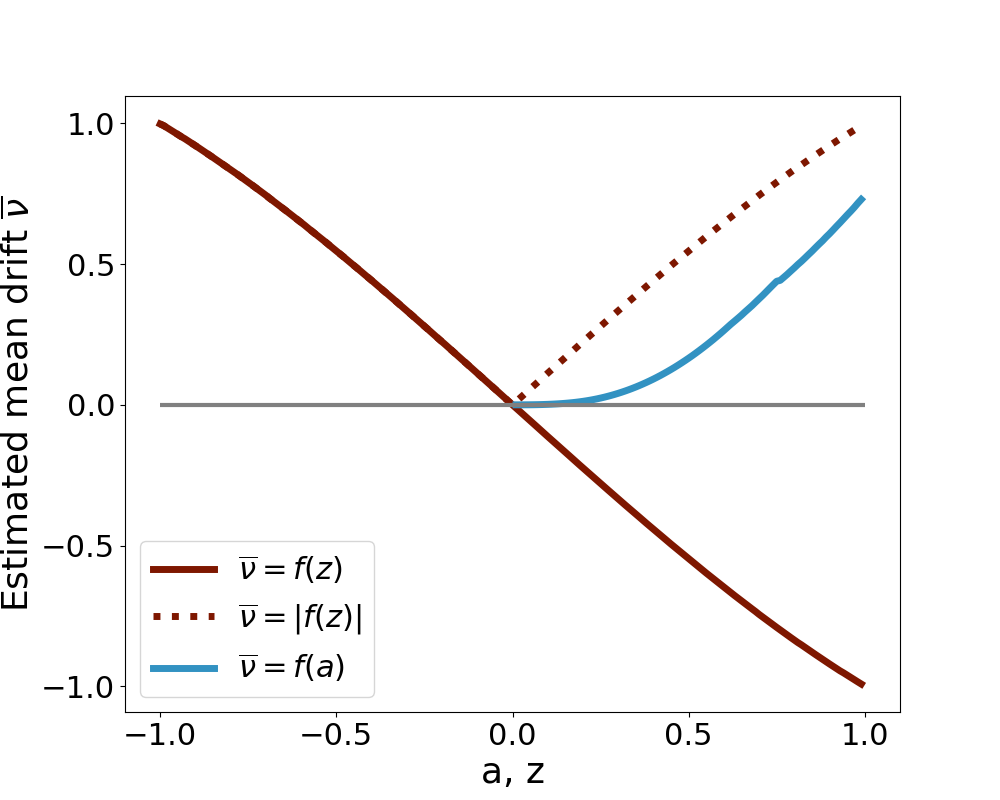

([<matplotlib.axis.XTick at 0x208c871f1c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [9]:
from utilities import mean_max_drift

zs=np.arange(-1,1,0.01)
a=1
k=1
drifts_z=[]
for z in zs:
    drifts_z.append(mean_max_drift(a,k,z))
z=-0.7
a_s=np.arange(0.01,1,0.01)
drifts_a=[]
for a in a_s:
    drifts_a.append(mean_max_drift(a,k,z))
plt.figure(figsize=(10,8))
plt.plot(zs,drifts_z, '#7E1700', linewidth=5, label=r'$\overline{\nu}=f(z)$')
plt.plot(zs, np.abs(drifts_z), '#7E1700', linewidth=5, linestyle="dotted", label=r'$\overline{\nu}=|f(z)|$')
plt.plot(a_s, drifts_a, '#3292C2', linewidth=5, label=r'$\overline{\nu}=f(a)$')
plt.hlines(0,1,-1, 'grey', linestyle='solid',linewidth=3)
plt.legend(fontsize=22)
plt.ylabel(r'Estimated mean drift $\overline{\nu}$',fontsize=26)
plt.xlabel('a, z', fontsize=26)
plt.yticks([-1,-0.5, 0,0.5,1],fontsize=22)
plt.xticks([-1,-0.5, 0,0.5,1], fontsize=22)